In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
PATH='/home/andre/PycharmProjects/onos_short_path/parser/'
TXT_FILES_PATH = PATH + 'txtFiles/'
ITG_PATH = '/home/andre/Загрузки/D-ITG-2.8.1-r1023-src/D-ITG-2.8.1-r1023/bin/'

### Отправка пакетов размером 1000 byte с большим rate (10_000_000 pkts/s) в несколько потоков

<img src="assets/1-1_10m-1flow.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

##### Рост доли потерянных пакетов при увеличении количества потоков

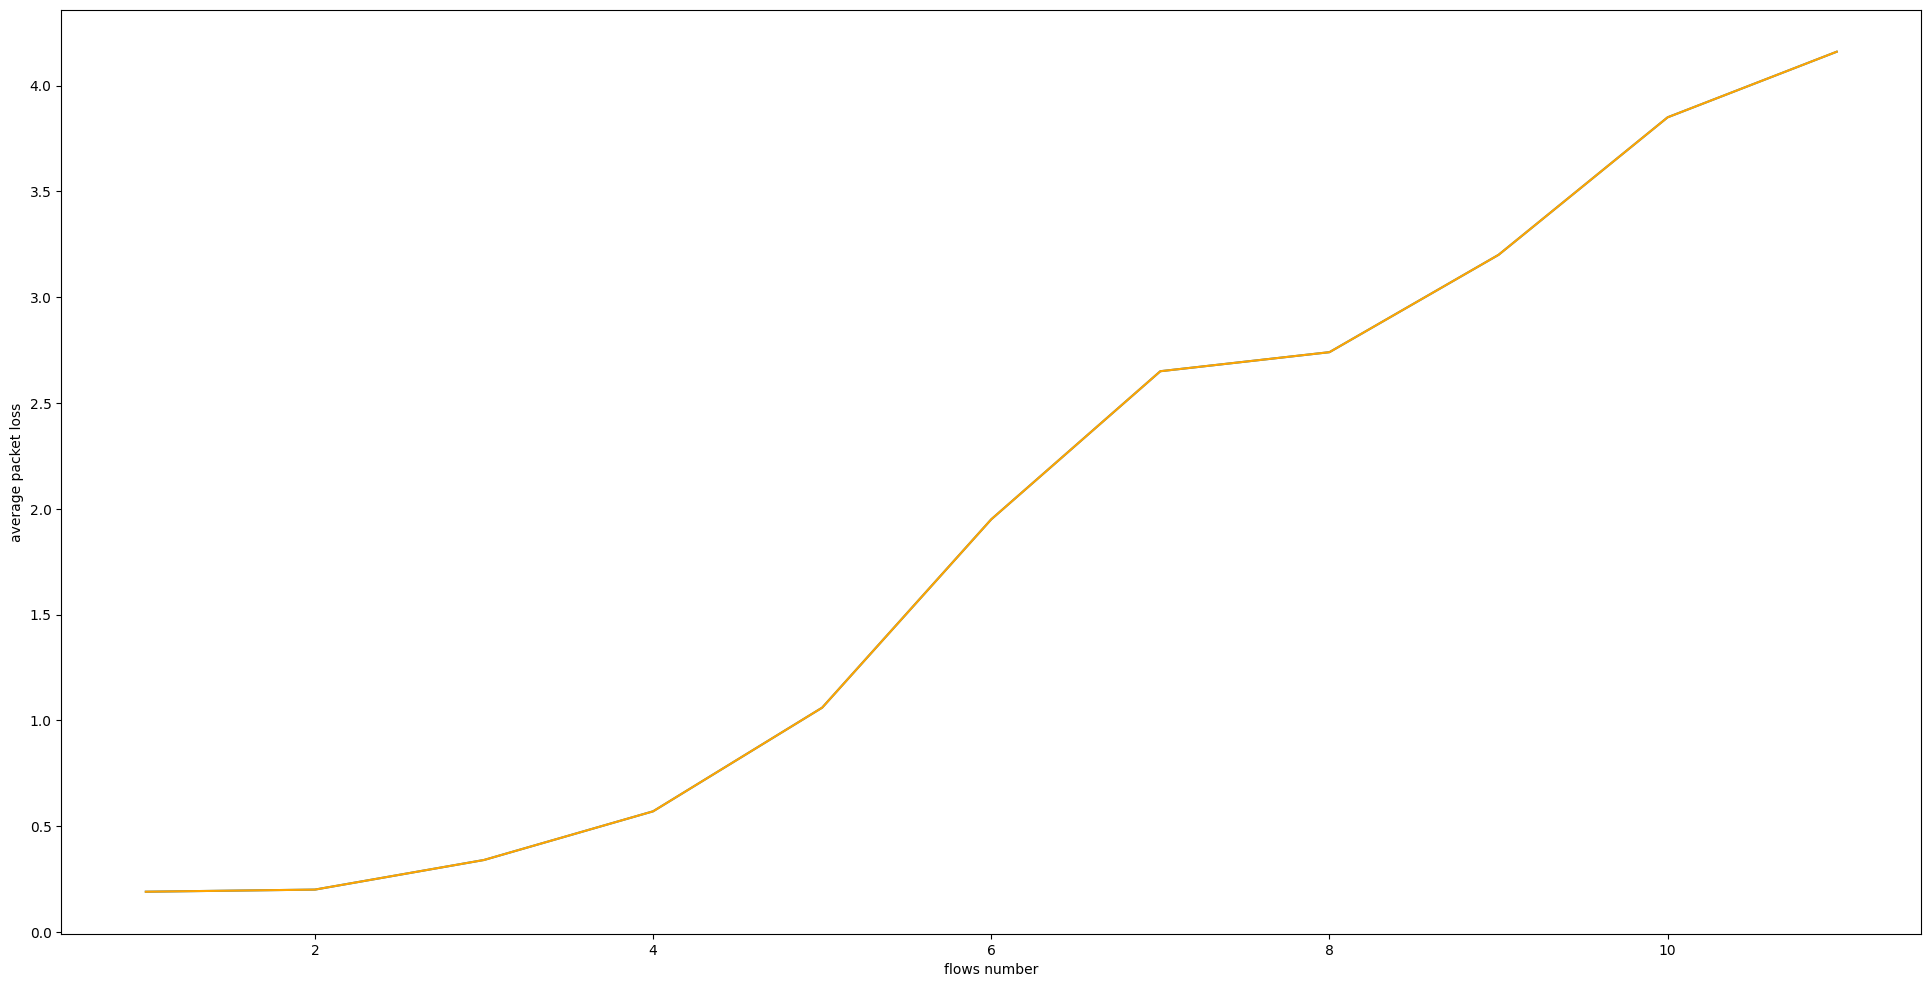

In [16]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = [1,2,3,4,5,6,7,8,9,10,11]
y = [0.19, 0.20, 0.34, 0.57, 1.06, 1.95, 2.65, 2.74, 3.20, 3.85, 4.16]
ax.plot(x, y)

ax.set_xlabel('flows number')
ax.set_ylabel('average packet loss')

ax.plot(x, y, color='orange')

plt.show()

#### Определение модели распределения?

### Отправка пакетов с 5 устройств на 1 (порт сохраняется)

#### -c 512 -C 1000 -t 10000

In [19]:
Time = []
with open(TXT_FILES_PATH + 'T.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        Time.append(split_line[0].replace(",", "."))

PL_lists = [[] for x in range(1,6)]
for i in range (2, 5+1):
    with open(TXT_FILES_PATH + f'PL{i}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            PL_lists[i-1].append(split_line[0].replace(",", "."))
    
df1 = pd.DataFrame({
    "time":Time,
    #"packetLoss1": PL_lists[0],
    "packetLoss2": PL_lists[1],
    "packetLoss3": PL_lists[2],
    "packetLoss4": PL_lists[3],
    "packetLoss5": PL_lists[4],
})
df1.time = df1.time.apply(float)
#df1.packetLoss1 = df1.packetLoss1.apply(float)
df1.packetLoss2 = df1.packetLoss2.apply(float)
df1.packetLoss3 = df1.packetLoss3.apply(float)
df1.packetLoss4 = df1.packetLoss4.apply(float)
df1.packetLoss5 = df1.packetLoss5.apply(float)
df1

,time,packetLoss2,packetLoss3,packetLoss4,packetLoss5
0,0.00,0.0,1.0,0.0,5.0
1,0.01,0.0,0.0,0.0,15.0
2,0.02,0.0,0.0,0.0,0.0
3,0.03,0.0,0.0,0.0,0.0
4,0.04,0.0,0.0,1.0,0.0
...,...,...,...,...,...
995,9.95,89.0,3.0,7.0,7.0
996,9.96,1.0,15.0,0.0,0.0
997,9.97,0.0,1.0,0.0,220.0
998,9.98,0.0,0.0,0.0,11.0


<img src="assets/2-to-1.png" width="600" />

<img src="assets/3-to-1.png" width="600" />

<img src="assets/4-to-1.png" width="600" />

<img src="assets/5-to-1.png" width="600" />

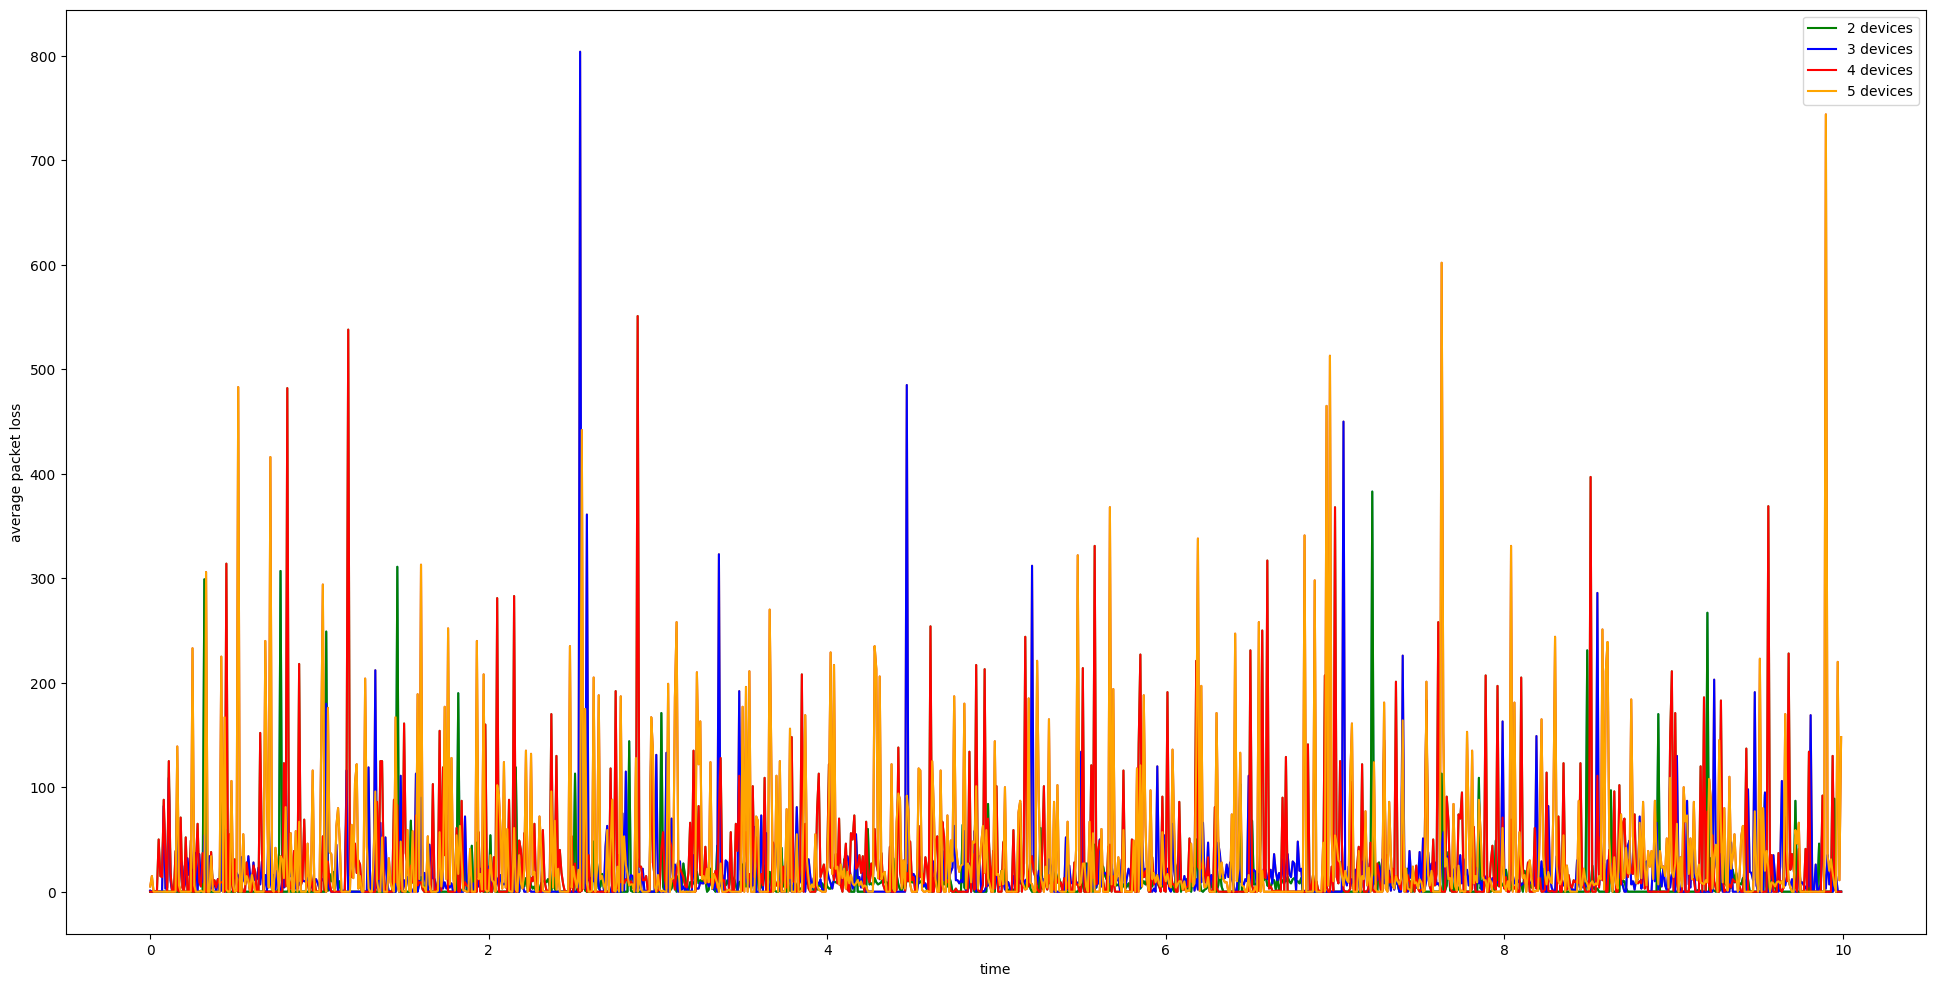

In [21]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = df1['time']
#y1 = df1['packetLoss1']
y2 = df1['packetLoss2']
y3 = df1['packetLoss3']
y4 = df1['packetLoss4']
y5 = df1['packetLoss5']
#ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)

ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

#ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y2, label = '2 devices', color='green')
ax.plot(x, y3, label = '3 devices', color='blue')
ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y5, label = '5 devices', color='orange')
ax.legend()

plt.show()

#### Причина многократного роста Packet loss при отправки пакетов с разных устройств?

# All-to-all case

In [267]:
# number of hosts in topology
nodes_num = 15
# push average packet loss to file every <PT> milliseconds
PT = 100

In [268]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv_all_{i+1}.log -p {PT} packetloss{i+1}.dat');

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 223366 characters

In [269]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
            if len(split_line) != nodes_num+1:
                i += 1
            else:
                recv_data[i].append(split_line[nodes_num].replace(",", "."))

print(len(time))
for i in recv_data:
    print(len(i))

9329
626
625
614
0
615
0
626
620
630
621
623
622
0
0
0


In [270]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 614


,time,packetloss1,packetloss2,packetloss3,packetloss5,packetloss7,packetloss8,packetloss9,packetloss10,packetloss11,packetloss12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
609,60.8,0.0,28.0,25.0,5.0,59.0,12.0,120.0,244.0,36.0,8.0
610,60.9,0.0,24.0,33.0,0.0,0.0,1.0,154.0,43.0,6.0,22.0
611,61.0,0.0,0.0,53.0,0.0,42.0,44.0,40.0,1.0,2.0,101.0
612,61.1,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,4.0,93.0


In [271]:
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv_all_{i+1}.log -l recv{i+1}.txt')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 111878 characters

In [272]:
pl = []
received_pkts = []
dropped_pkts = []
for i in range(nodes_num):
    map_count = {}
    map_max = {}
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            src_socket = split_line[4]
            addr_index = src_socket.index("/")
            src_addr = src_socket[:addr_index]
            if src_addr not in map_count:
                map_count[src_addr] = 0
                map_max[src_addr] = 0
            map_count[src_addr] += 1
            if int(split_line[2]) > map_max[src_addr]:
                map_max[src_addr] = int(split_line[2])
    received_pkts.append(sum(map_count.values()))
    dropped_pkts.append(sum(map_max.values()) - sum(map_count.values()))
    pl.append(round((1 - sum(map_count.values()) / sum(map_max.values())) * 100, 2))

#t_mean = [i for i in t if i >= 0]
#pl = [i for i in pl if i >= 0]

print(f'received pkts: {received_pkts}')
print(f'dropped_pkts: {dropped_pkts}; total: {sum(dropped_pkts)}')
total_pkts_num = 0
for i in t:
    total_pkts_num += i

print("total_pkts_num: ", total_pkts_num)
pkt_size = 472
modeling_time = 60
print(f"throughput: {total_pkts_num / modeling_time * pkt_size / 125_000} Mbts/s \n")

print(f'Packetloss for each receiver: {pl}')
print(f'Total packetloss: {round((sum(dropped_pkts) / (total_pkts_num + sum(dropped_pkts))) * 100, 2)} %')

received pkts: [148053, 145405, 132179, 142501, 146321, 149114, 150354, 139986, 130801, 145747, 141001, 146042, 110861, 111492, 105243]
dropped_pkts: [75226, 67356, 68879, 76871, 77360, 67251, 69668, 69637, 84720, 68080, 75832, 65526, 67489, 74476, 65376]; total: 1073747
total_pkts_num:  2045100
throughput: 128.70496 Mbts/s 

Packetloss for each receiver: [33.69, 31.66, 34.26, 35.04, 34.58, 31.08, 31.66, 33.22, 39.31, 31.84, 34.97, 30.97, 37.84, 40.05, 38.32]
Total packetloss: 34.43 %


In [213]:


map_count = {}
map_max = {}
nums = []
addrs = []
with open(ITG_PATH + f'recv{9}.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        src_socket = split_line[4]
        addr_index = src_socket.index("/")
        src_addr = src_socket[:addr_index]
        
        nums.append(split_line[2])
        addrs.append(src_addr)

pl_df = pd.DataFrame({'pkt_num':nums, 'addr':addrs})
pl_df

,pkt_num,addr
0,1,192.168.0.6
1,2,192.168.0.6
2,3,192.168.0.6
3,4,192.168.0.6
4,5,192.168.0.6
...,...,...
679452,19364,192.168.0.8
679453,24489,192.168.0.8
679454,20862,192.168.0.8
679455,24025,192.168.0.8


In [214]:
for i in range(1,16):
    a = f'192.168.0.{i}'
    print(a, len(pl_df.query(f"addr == '192.168.0.{i}'")))
    # print(f'192.168.0.{i} : {len(pl_df.query(addr == "192.168.0.1"))}')

192.168.0.1 28568
192.168.0.2 28596
192.168.0.3 26675
192.168.0.4 163155
192.168.0.5 28547
192.168.0.6 28552
192.168.0.7 28556
192.168.0.8 175553
192.168.0.9 0
192.168.0.10 28529
192.168.0.11 28517
192.168.0.12 28524
192.168.0.13 28583
192.168.0.14 28519
192.168.0.15 28583


In [216]:
pl_df.loc[(pl_df['addr'] >= '192.168.0.4') & (pl_df['pkt_num'] == '1'), 'pkt_num']

0        1
100      1
3450     1
6650     1
9360     1
12161    1
38600    1
41759    1
45394    1
50363    1
Name: pkt_num, dtype: object

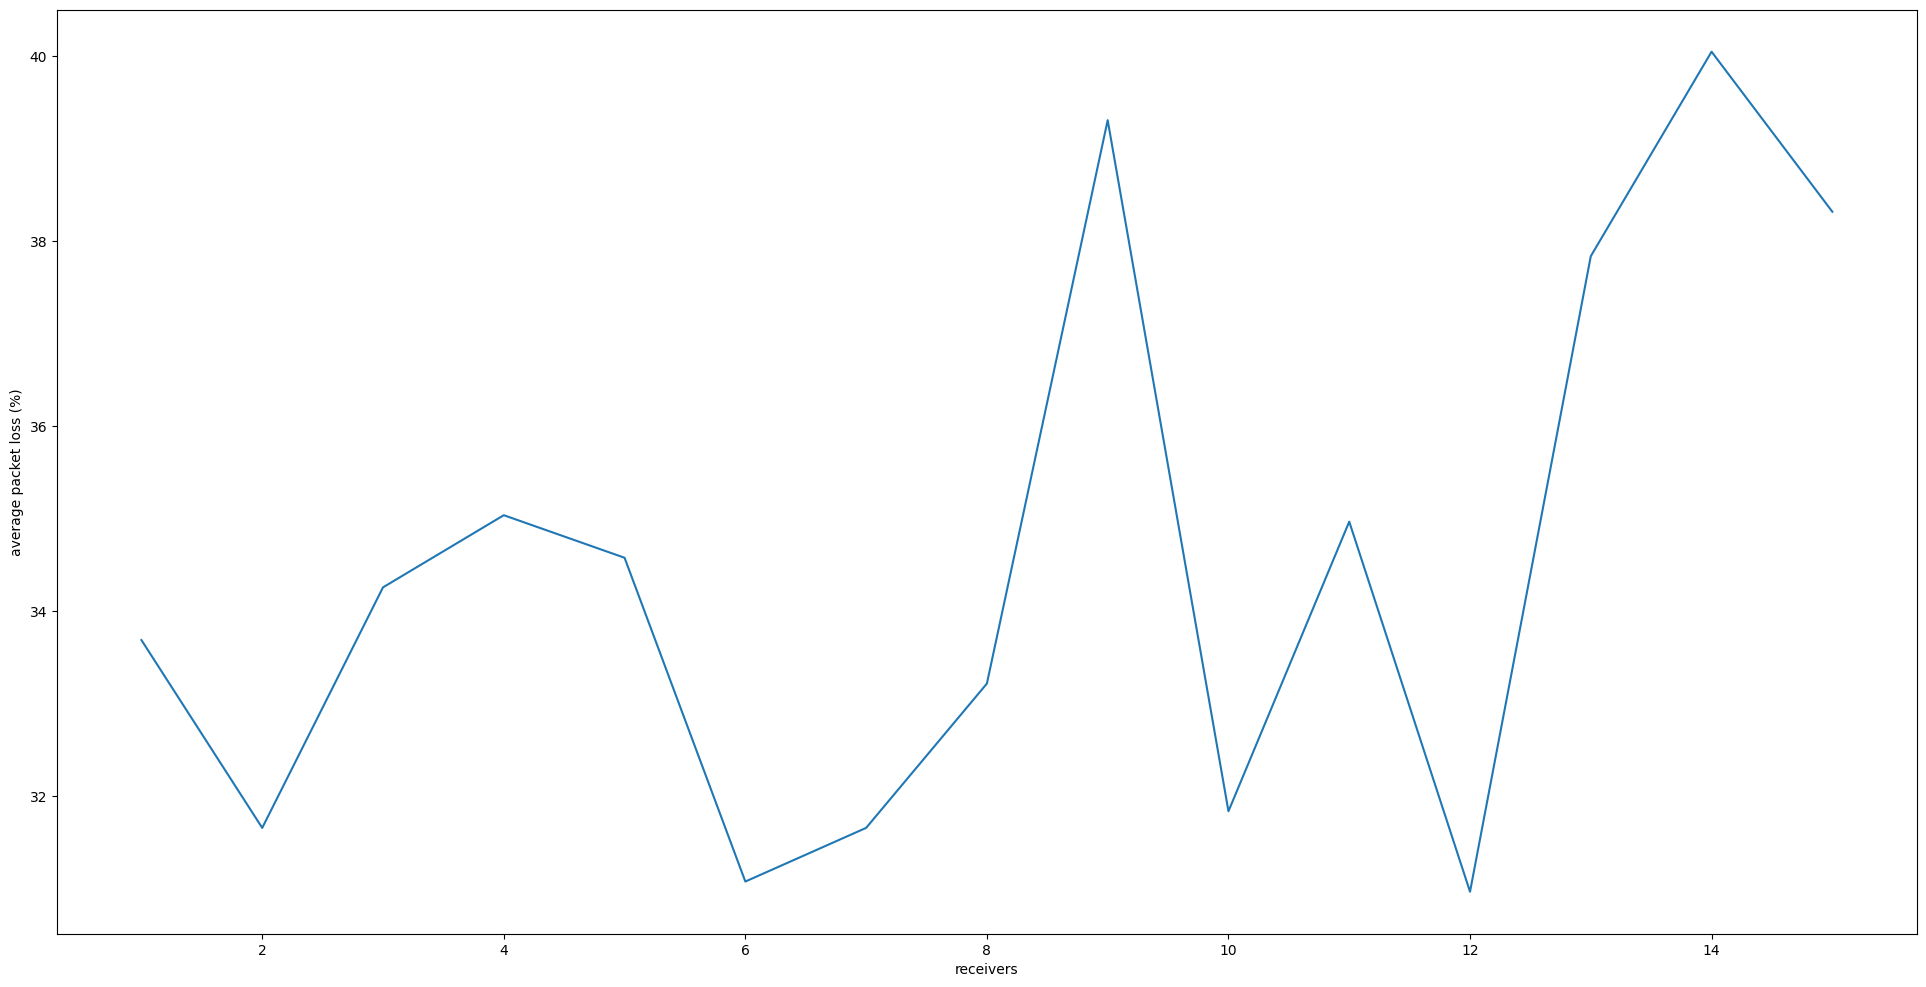

In [273]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot([x for x in range(1, nodes_num+1)], pl)

ax.set_xlabel('receivers')
ax.set_ylabel('average packet loss (%)')

plt.show()

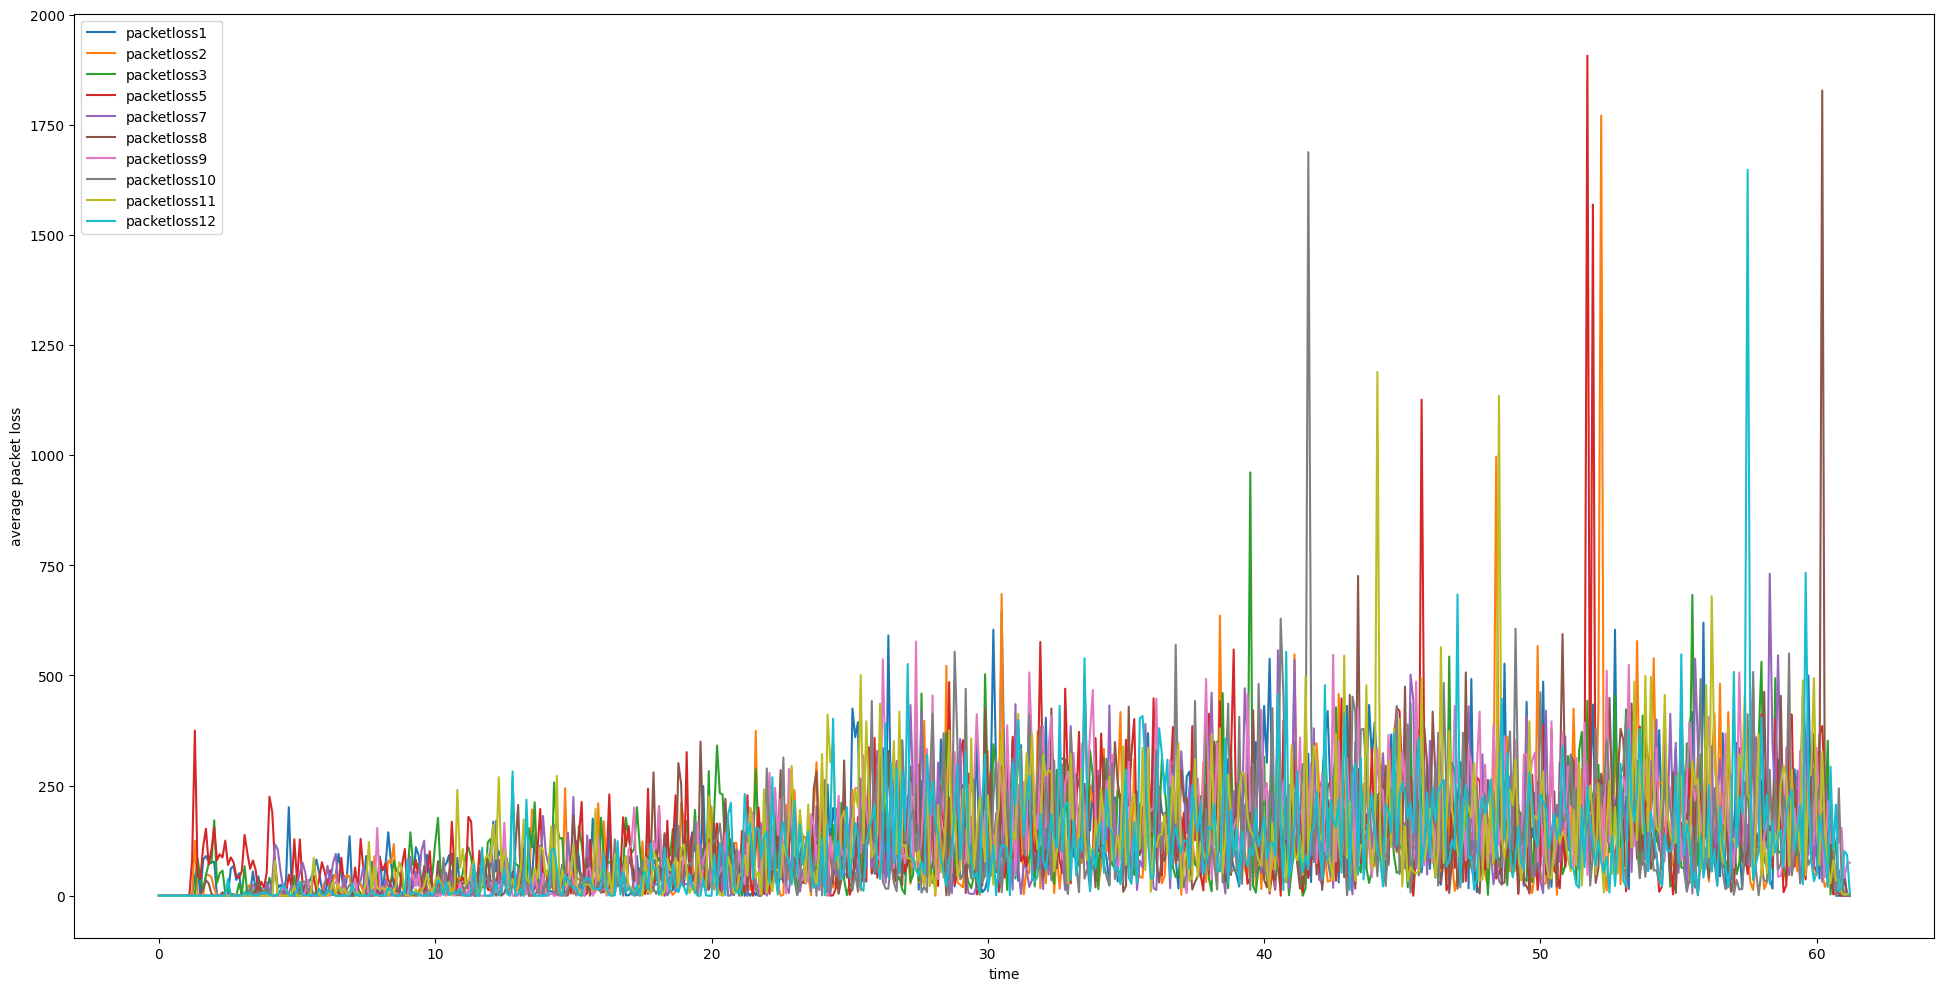

In [274]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

plt.show()

In [275]:
modeling_time = 60
plhist = []
plhist
step = 1
for j in np.arange(0, modeling_time, step):
    s = 0
    for i in range(1, nodes_num+1):
        if j != modeling_time - step:
            s += len(pl_df.query(f"time >= {j} and time <= {j+step} and packetloss{i} > 0.0"))
        else:
            s += len(pl_df.query(f"time >= {j} and packetloss{i} > 0.0"))
    plhist.append(s)
print(plhist)
df = pd.DataFrame({
    'time': [x for x in np.arange(step,modeling_time+step,step)],
    'pkts': plhist
    })

UndefinedVariableError: name 'packetloss4' is not defined

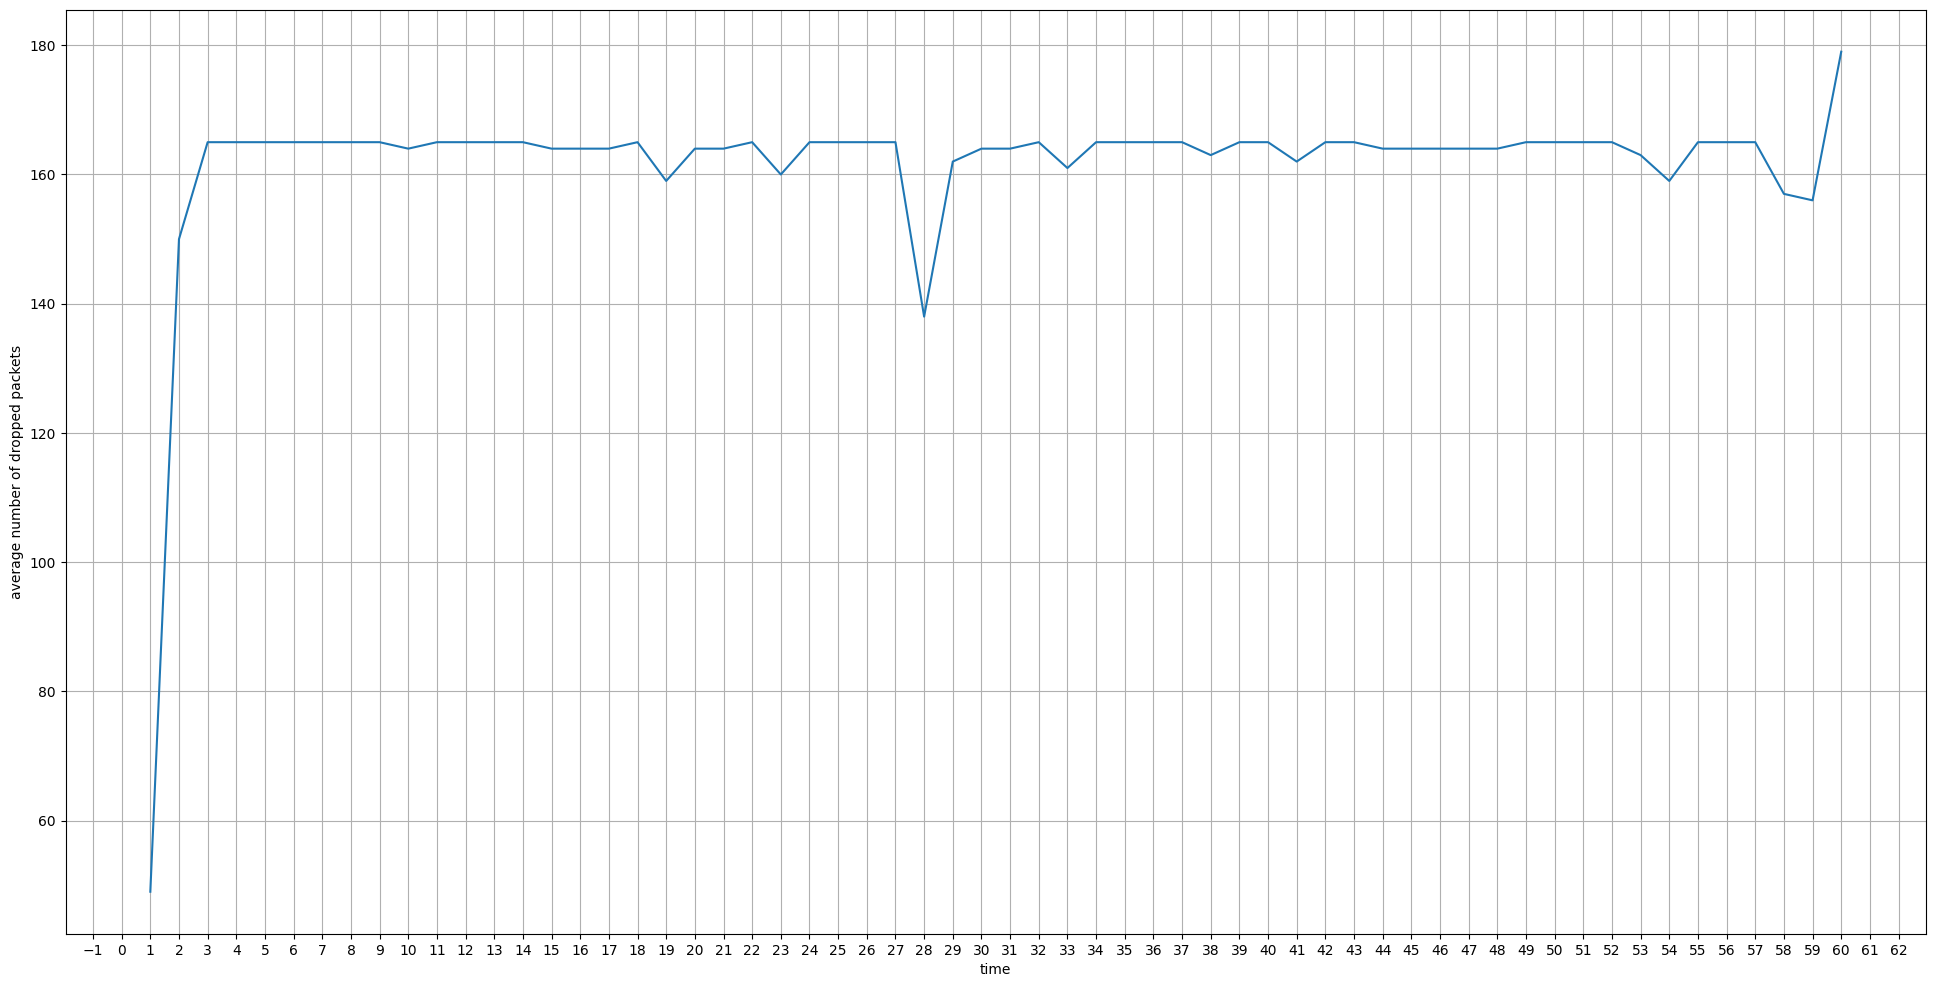

In [239]:
import matplotlib.ticker as ticker
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
# ax.scatter(df['time'], plhist)
ax.plot(df['time'], plhist)

ax.set_xlabel('time')
ax.grid()
ax.set_ylabel('average number of dropped packets')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [240]:
modeling_time = 60
plhist = []
plhist
step = 1
for j in np.arange(0, modeling_time, step):
    s = 0
    for i in range(1, nodes_num+1):
        if j != modeling_time - step:
            s += pl_df.loc[(pl_df['time'] >= j) & (pl_df['time'] <= j+step), f'packetloss{i}'].sum()
        else:
            s += pl_df.loc[pl_df['time'] >= j, f'packetloss{i}'].sum()
    plhist.append(s)
print(f'{plhist}; total: {sum(plhist)}')
df = pd.DataFrame({
    'time': [x for x in np.arange(step,modeling_time+step,step)],
    'pkts': plhist
    })

[2479.0, 9989.0, 12356.0, 13191.0, 13471.0, 13330.0, 13677.0, 13544.0, 13020.0, 12640.0, 12497.0, 14052.0, 16672.0, 13664.0, 13747.0, 13582.0, 12966.0, 12952.0, 12571.0, 14039.0, 13513.0, 13772.0, 11972.0, 13638.0, 13600.0, 13742.0, 11959.0, 8969.0, 12132.0, 15814.0, 12854.0, 12321.0, 11919.0, 12883.0, 12523.0, 12655.0, 15583.0, 13539.0, 13819.0, 13595.0, 12980.0, 13619.0, 13958.0, 13531.0, 13196.0, 12829.0, 13618.0, 12916.0, 12714.0, 14395.0, 13423.0, 13561.0, 12050.0, 12549.0, 14049.0, 13451.0, 13726.0, 10655.0, 11763.0, 14105.0]; total: 778329.0


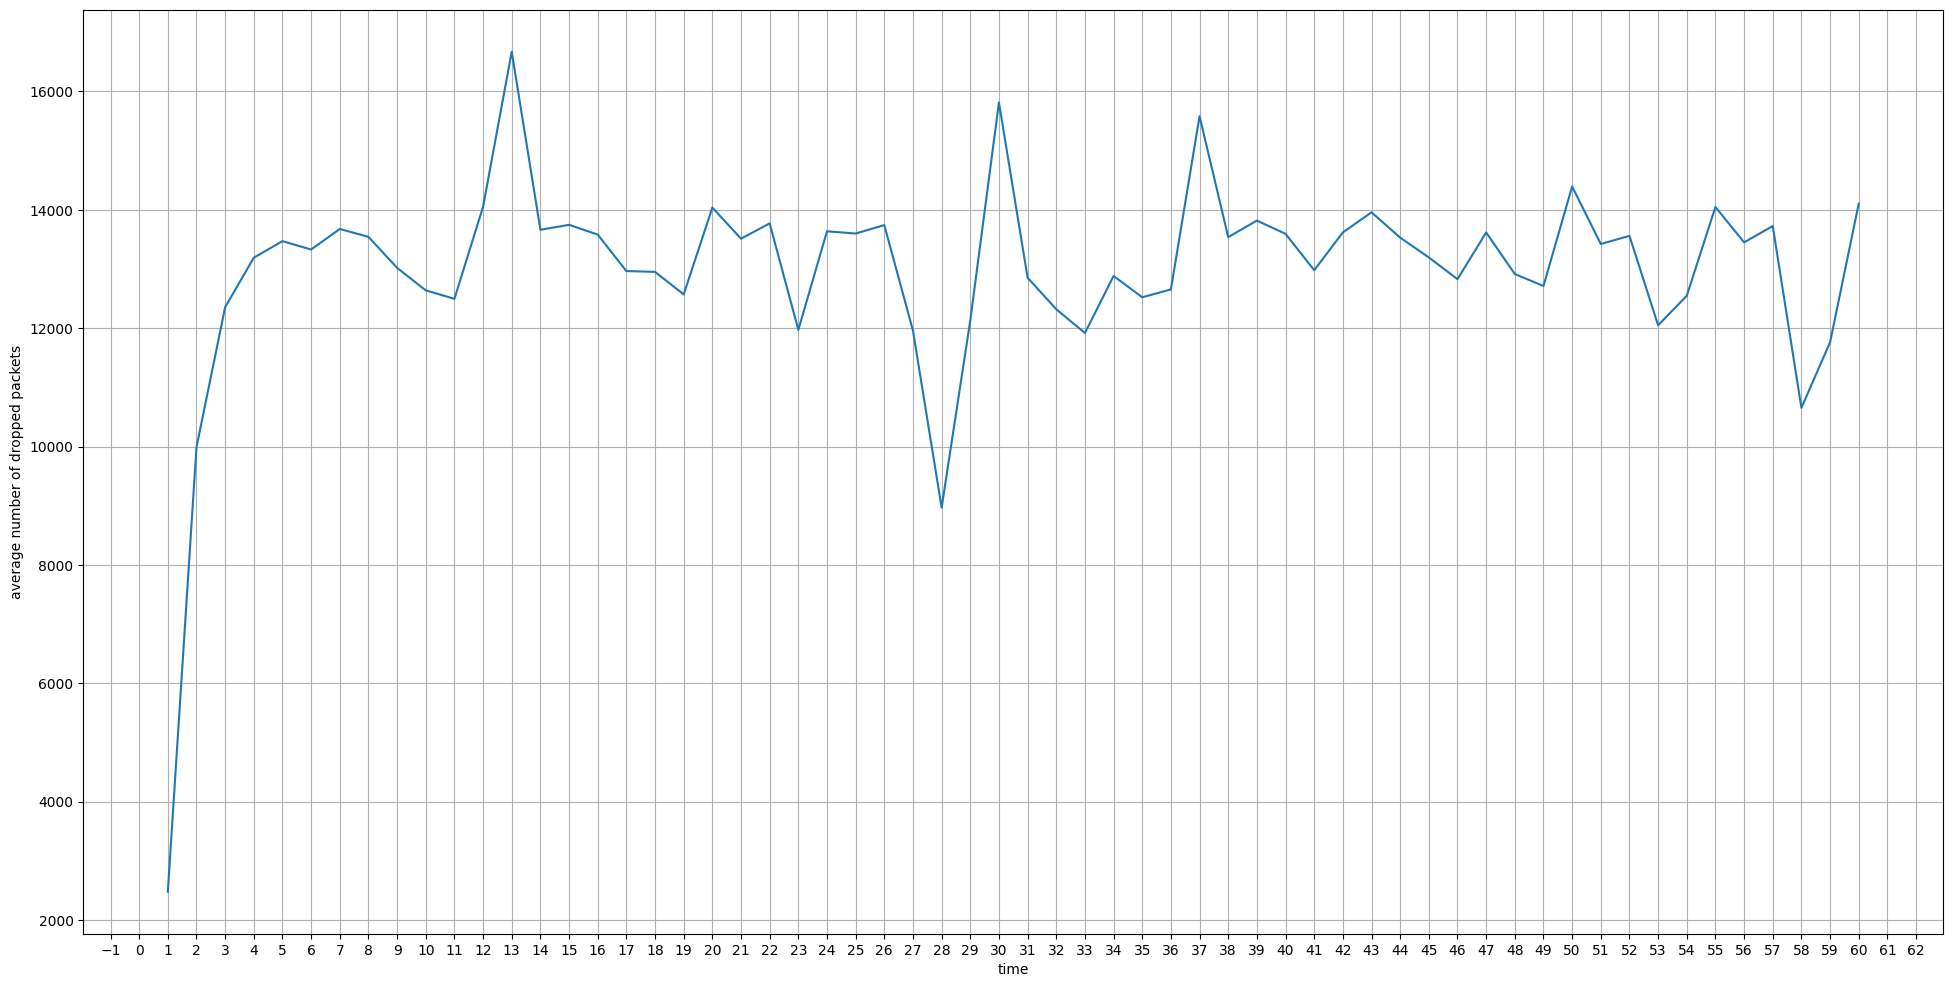

In [241]:
import matplotlib.ticker as ticker
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
# ax.scatter(df['time'], plhist)
ax.plot(df['time'], plhist)

ax.set_xlabel('time')
ax.grid()
ax.set_ylabel('average number of dropped packets')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

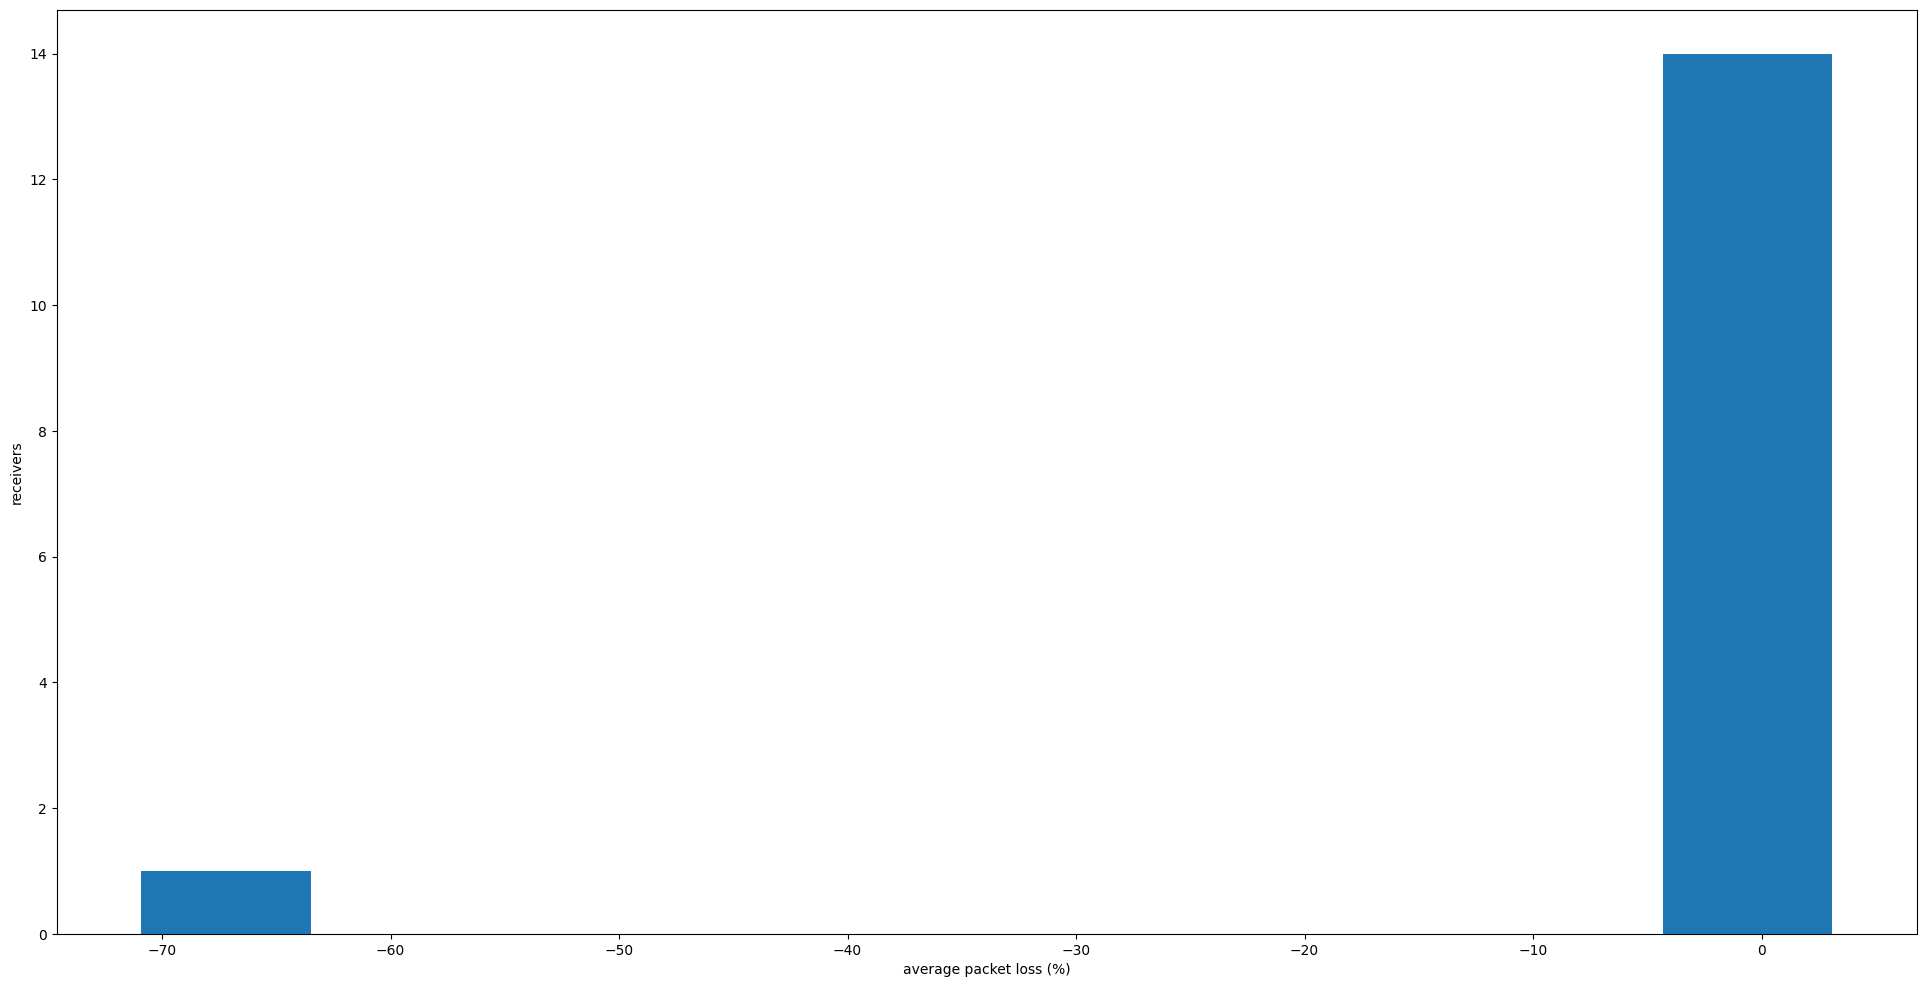

In [139]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()

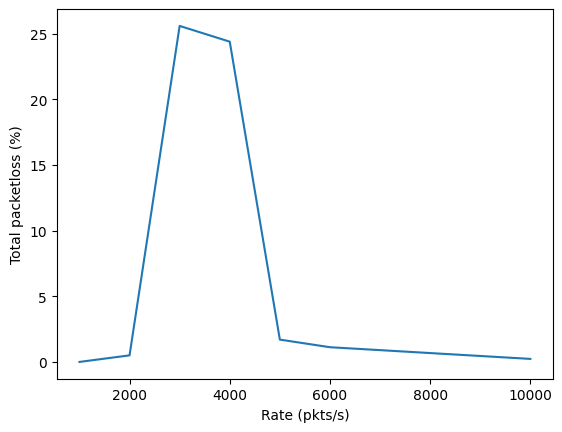

In [92]:
y = [0.0,0.5,25.6,24.4,1.7,1.12,0.23]
x = [1000,2000,3000,4000,5000,6000,10_000]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Rate (pkts/s)')
ax.set_ylabel('Total packetloss (%)')

plt.show()

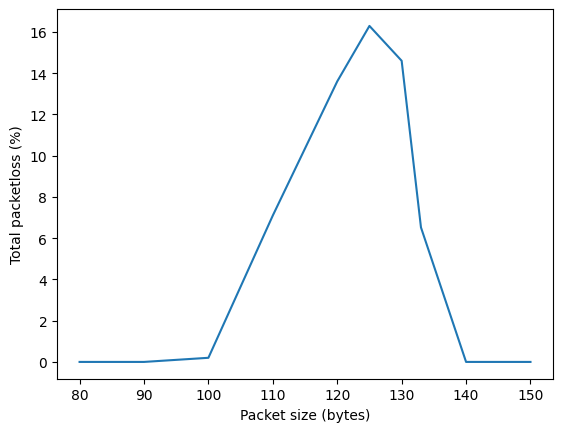

In [93]:
y = [0.0,0.0,0.2,7.1,13.6,16.29,14.6,6.52,0.0,0.0]
x = [80,90,100,110,120,125,130,133,140,150]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Packet size (bytes)')
ax.set_ylabel('Total packetloss (%)')

plt.show()

In [ ]:
y = [0.0,0.25,0.0,0.0,0.0,0.0]
x = [50,100,150,200,300,400]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Packet size (bytes)')
ax.set_ylabel('Total packetloss (%)')

plt.show()

# Custom case

In [15]:
# number of hosts in topology
nodes_num = 6
# push average packet loss to file every <PT> milliseconds
PT = 1

In [16]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -p {PT} packetloss{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 105276 characters

In [17]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
            # if len(split_line) < nodes_num+1:
            #     i += 1
            # else:
            recv_data[i].append(split_line[-1].replace(",", "."))

print(len(time))
for i in recv_data:
    print(len(i))

66878
11300
11698
10569
11745
11218
10348


In [18]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 10348


,time,packetloss1,packetloss2,packetloss3,packetloss4,packetloss5,packetloss6
1,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003,2.0,0.0,0.0,0.0,0.0,0.0
5,0.004,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10343,10.342,0.0,0.0,0.0,0.0,0.0,0.0
10344,10.343,0.0,0.0,0.0,0.0,0.0,0.0
10345,10.344,0.0,0.0,0.0,0.0,0.0,0.0
10346,10.345,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -l recv{i+1}.txt')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 105276 characters

In [20]:
pl = []
for i in range(nodes_num):
    map_count = {}
    map_max = {}
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            src_socket = split_line[4]
            if src_socket not in map_count:
                map_count[src_socket] = 0
                map_max[src_socket] = 0
            map_count[src_socket] += 1
            if int(split_line[2]) > map_max[src_socket]:
                map_max[src_socket] = int(split_line[2])
    pl.append(round((1 - sum(map_count.values()) / sum(map_max.values())) * 100, 2))

print(f'Packetloss for each receiver: {pl}')
print(f'Total packetloss: {sum(pl)} %')

Packetloss for each receiver: [0.09, 0.07, 0.11, 0.01, 0.08, 0.13]
Total packetloss: 0.49000000000000005 %


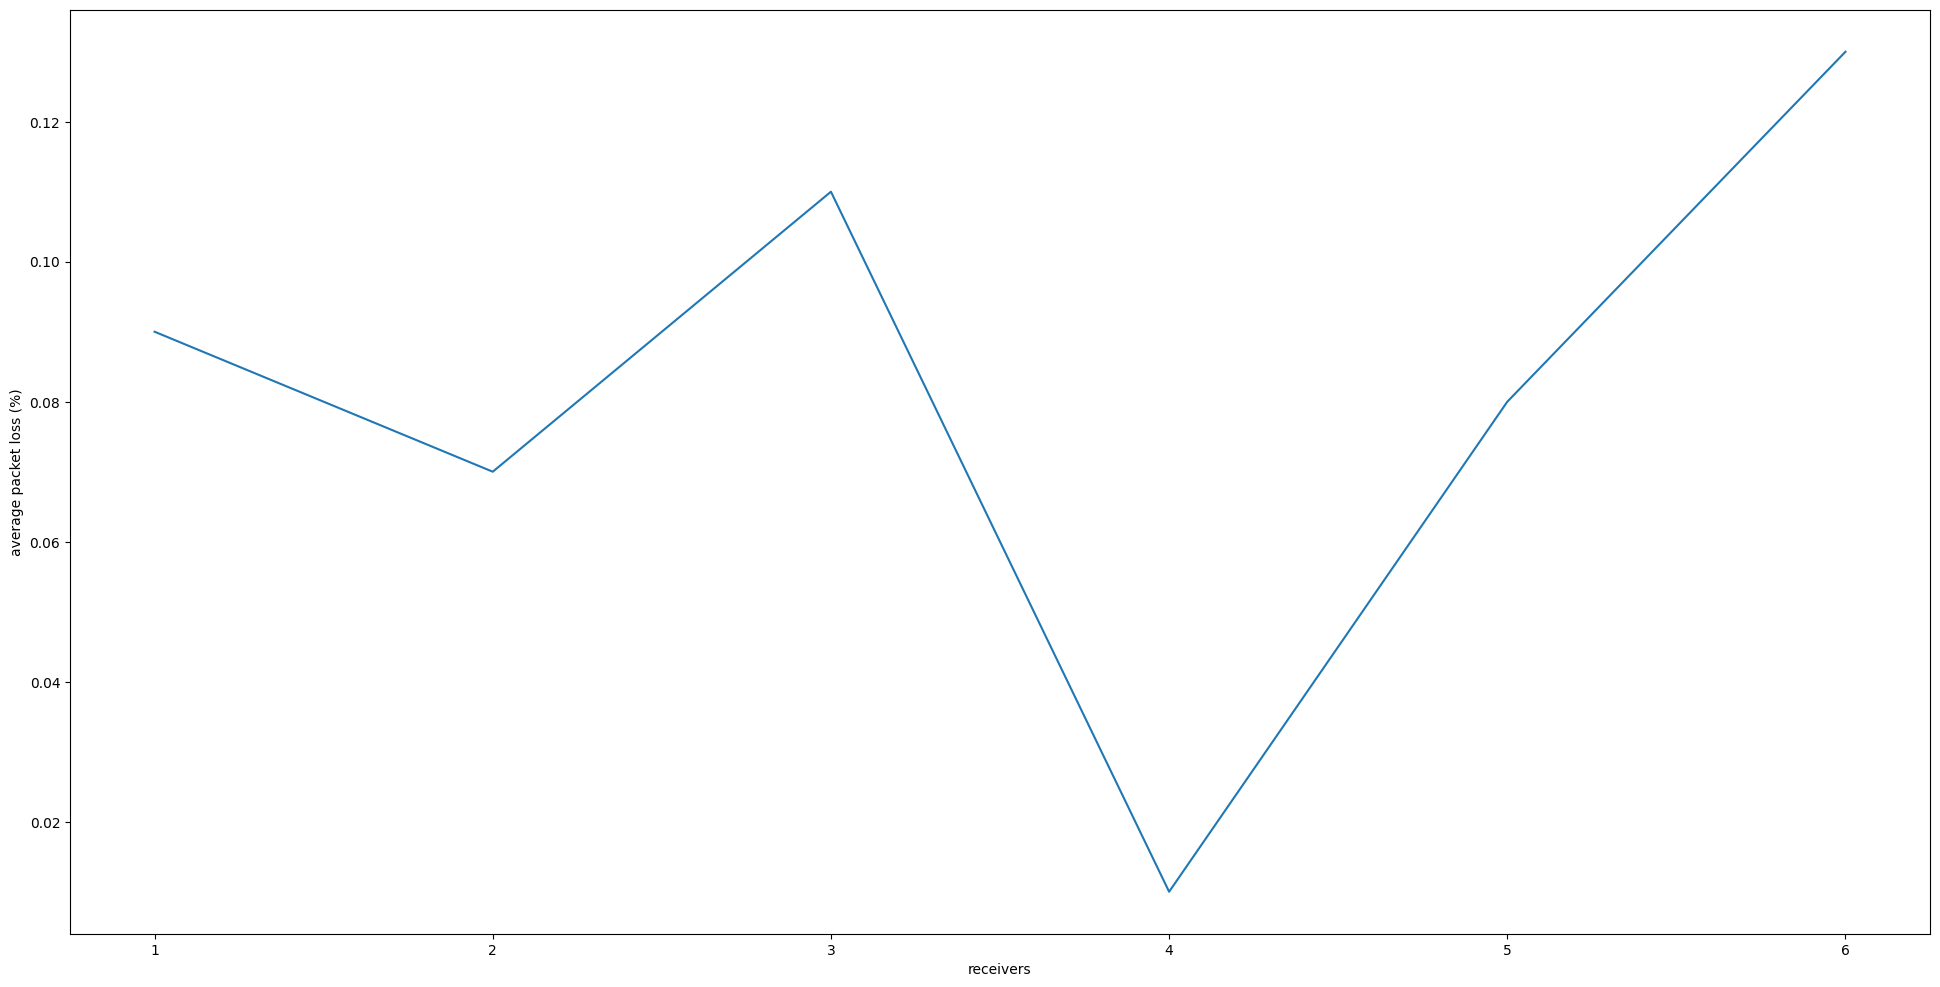

In [21]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot([x for x in range(1, nodes_num+1)], pl)

ax.set_xlabel('receivers')
ax.set_ylabel('average packet loss (%)')

plt.show()

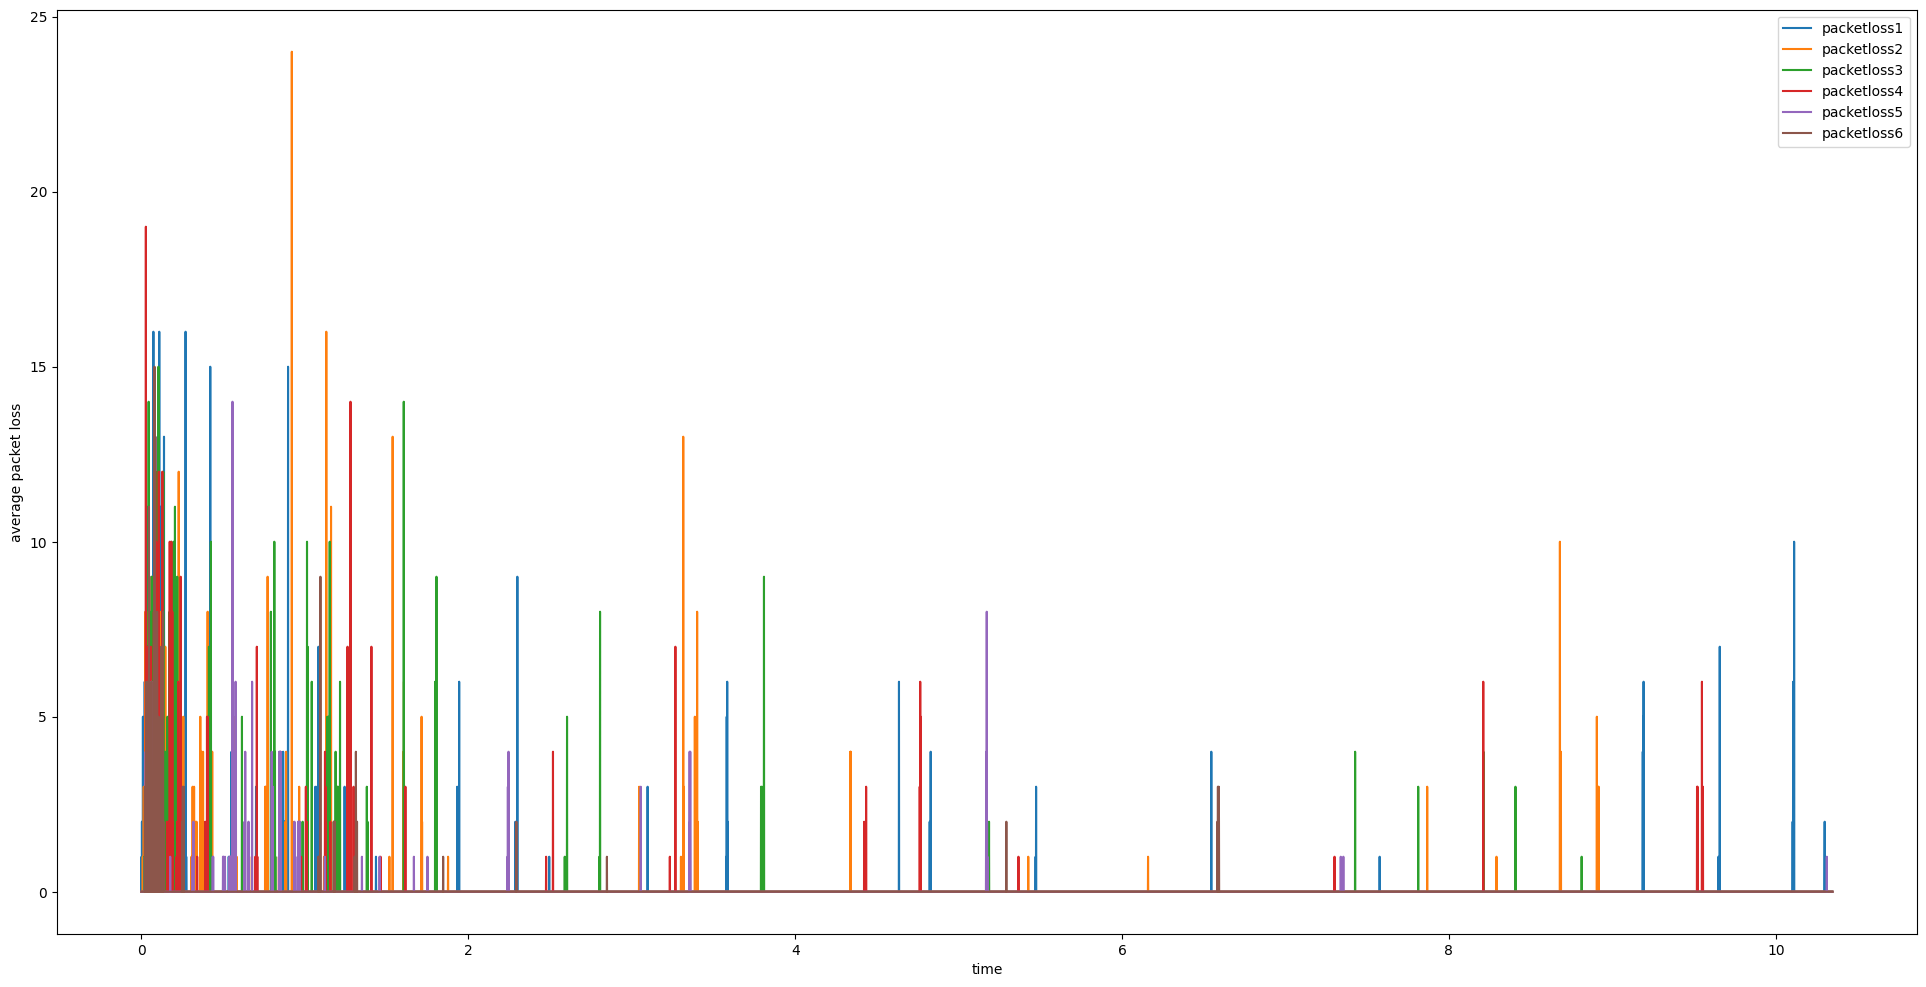

In [22]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

plt.show()

In [93]:
modeling_time = 10
plhist = [0]*modeling_time
plhist
for i in range(1, nodes_num+1):
    for j in range(0, modeling_time):
        if j != 9:
            plhist[j] += len(pl_df.query(f"time >= {j}.0 and time <= {j+1}.0 and packetloss{i} > 0.0"))
        else:
            plhist[j] += len(pl_df.query(f"time >= {j}.0 and packetloss{i} > 0.0"))
print(plhist)
df = pd.DataFrame({
    'time': [x for x in range(1,modeling_time+1)],
    'pkts': plhist
    })
df

[371, 69, 15, 24, 12, 11, 7, 7, 12, 16]


,time,pkts
0,1,371
1,2,69
2,3,15
3,4,24
4,5,12
5,6,11
6,7,7
7,8,7
8,9,12
9,10,16


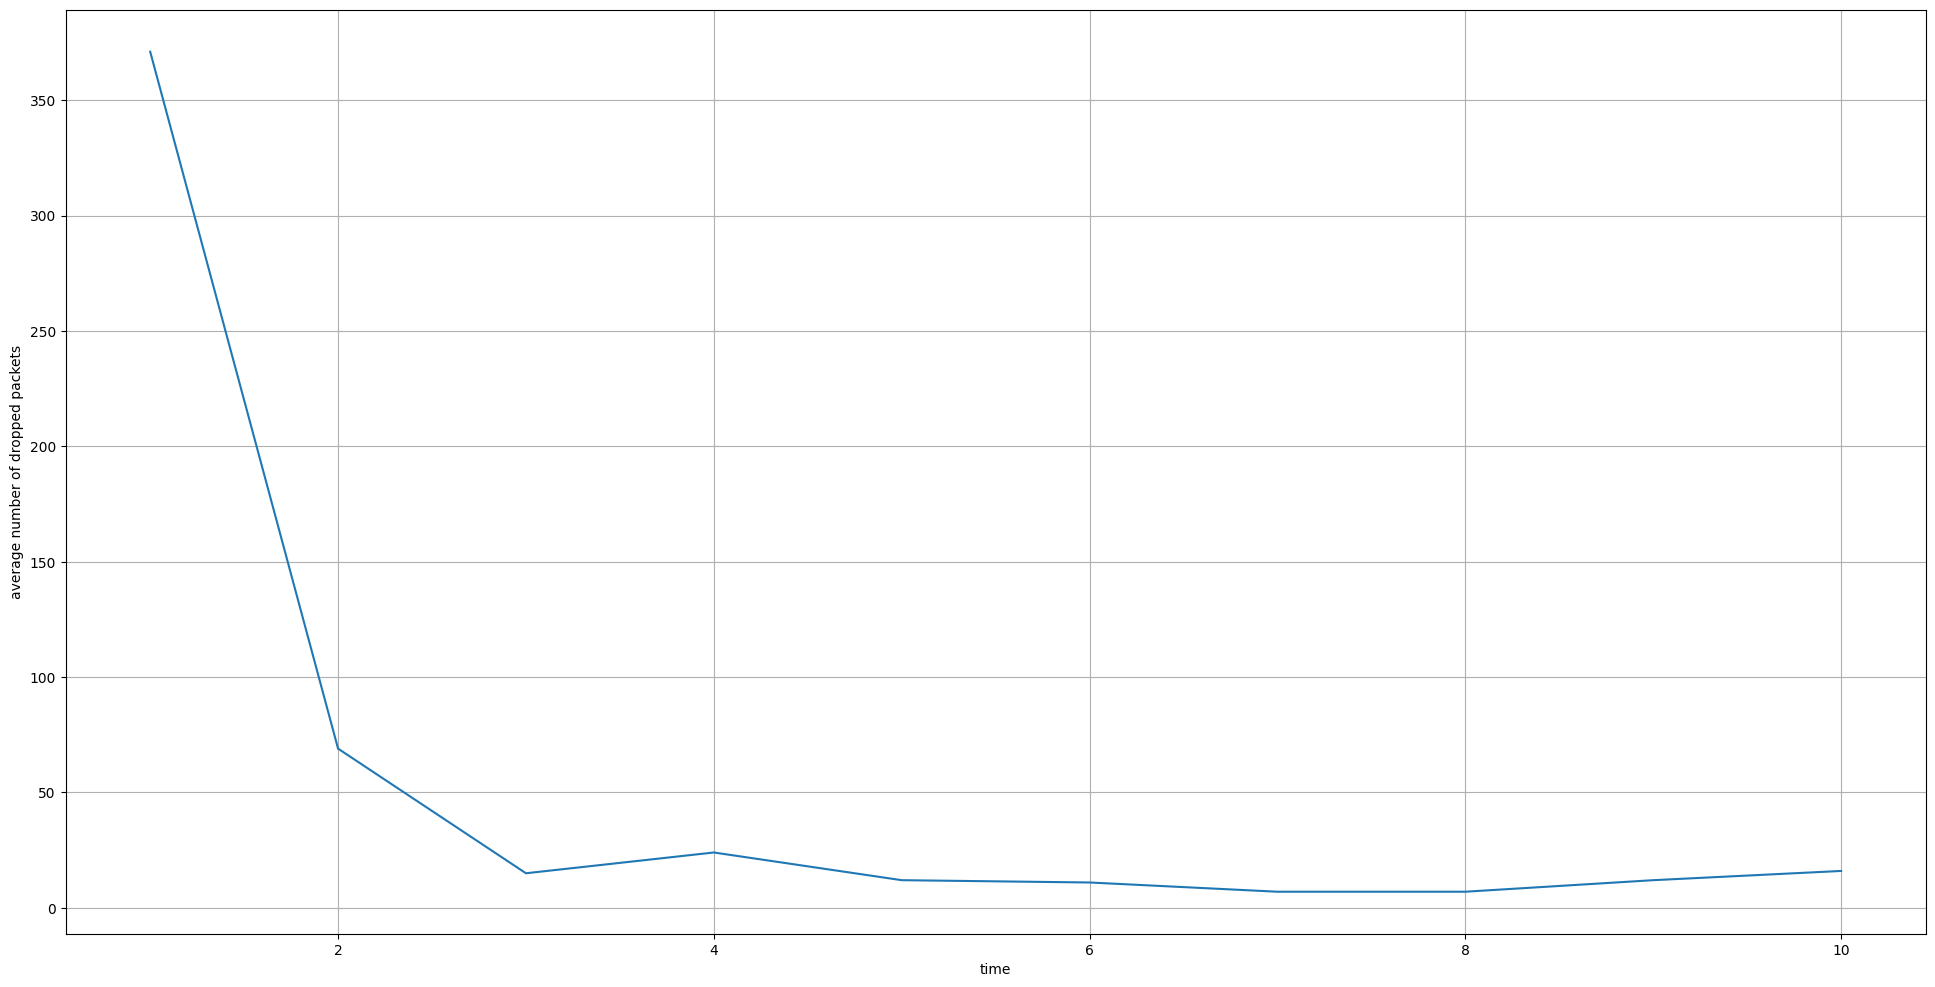

In [94]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
# ax.scatter(df['time'], plhist)
ax.plot(df['time'], plhist)

ax.set_xlabel('time')
ax.grid()
ax.set_ylabel('average number of dropped packets')

plt.show()

10347


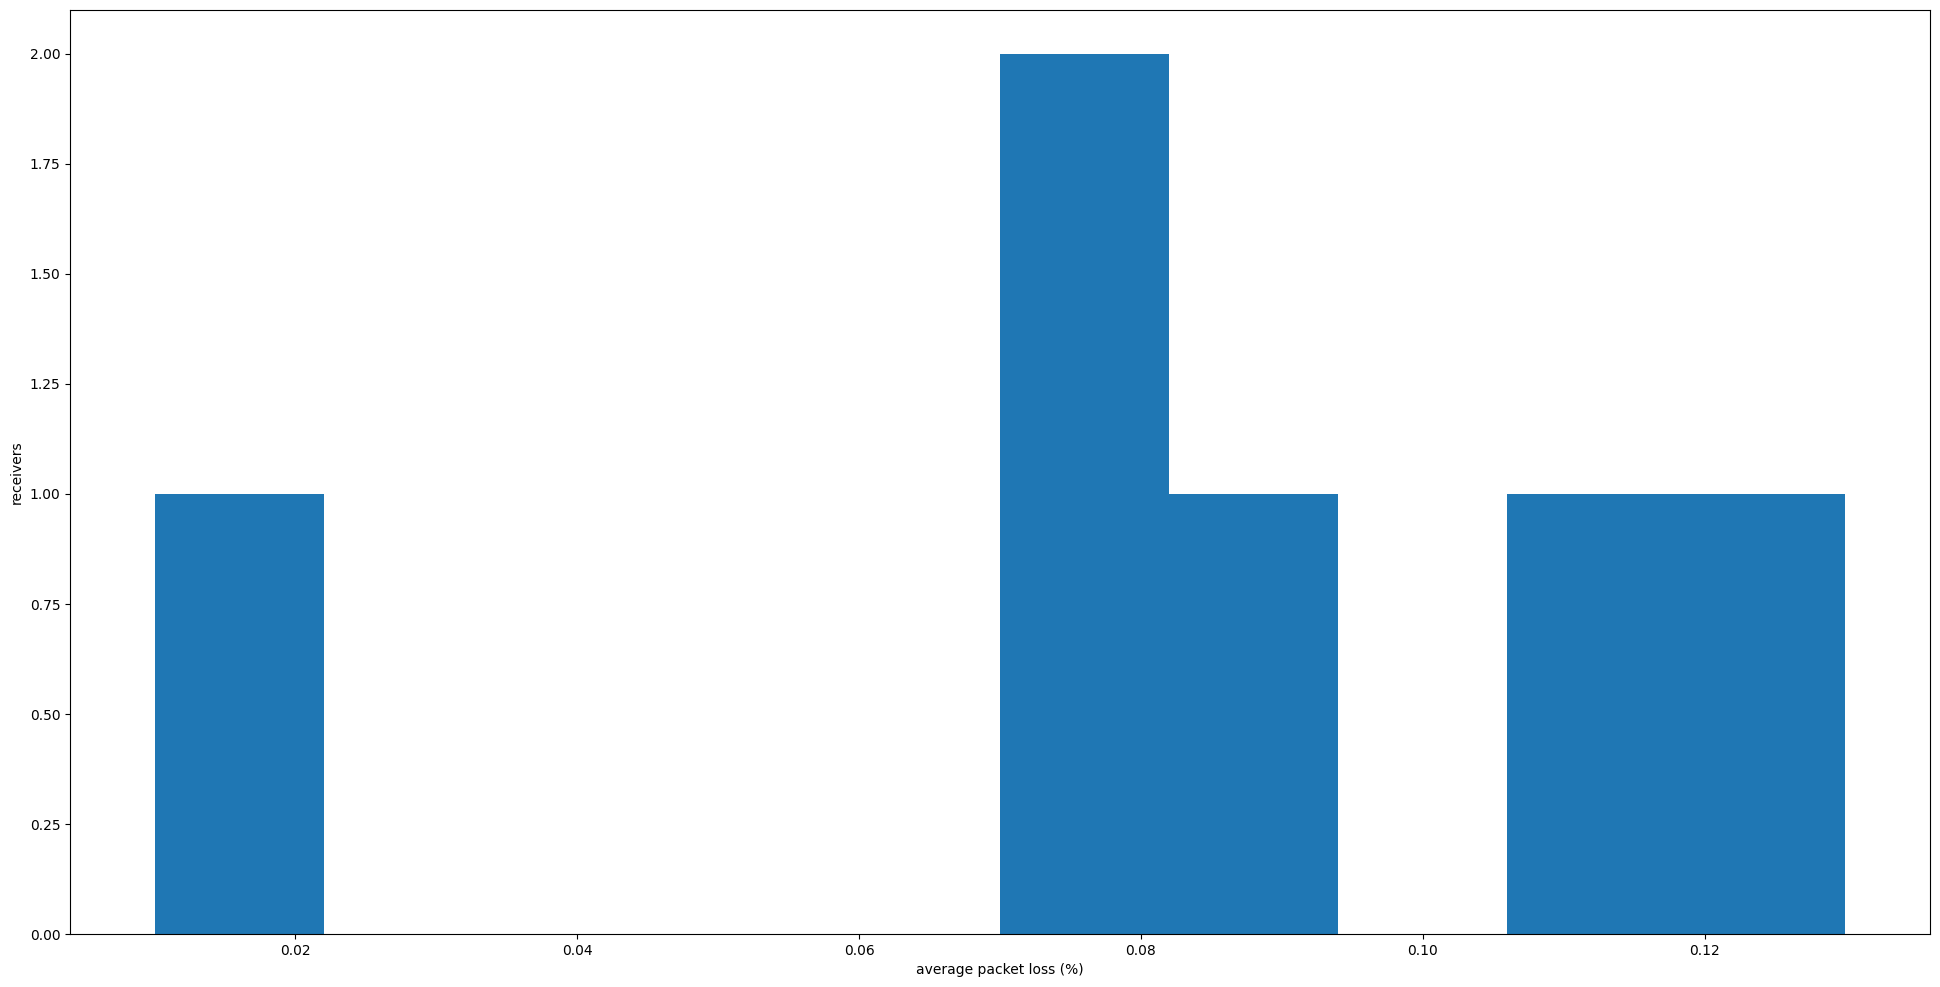

In [28]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
print(len(pl_df.iloc[:col_len, 1:nodes_num+1]))
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()

## Average Delay

In [13]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv_all_{i+1}.log -c 1 combined_stats{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 180952 characters

In [14]:
from datetime import datetime, timedelta

delays = []
C = 0
S = timedelta()
for i in range(nodes_num):
    c = 0
    sum_delay = timedelta()
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            C += 1
            c += 1
            split_line = line.split()
            tx_time = split_line[7][7:]
            rx_time = split_line[8][7:]
            delay = datetime.strptime(rx_time,"%H:%M:%S.%f") - datetime.strptime(tx_time,"%H:%M:%S.%f") 
            S += delay
            sum_delay += delay
    delays.append(sum_delay / c)

print(delays)
print(S / C)

[datetime.timedelta(microseconds=115540), datetime.timedelta(microseconds=110877), datetime.timedelta(microseconds=112844), datetime.timedelta(microseconds=112963), datetime.timedelta(microseconds=113991), datetime.timedelta(microseconds=113115)]
0:00:00.113201
